2a) Implement K=1 and K=3 NN classifier for MNIST data using 200 samples.  Report empirical accuracy.

In [1]:
import numpy as np
import imp
N_samp = 200
N_test = 0
digit_list = [1, 2, 7]
import problem2_func
imp.reload(problem2_func)
[x_train, y_train, x_test, y_test]=problem2_func.load_digits(N_samp,N_test,digit_list)

y1 = problem2_func.classify(x_train,y_train,x_test,1)
print('Accuracy of K=1 NN:', problem2_func.accuracy(y_test,y1))
y3 = problem2_func.classify(x_train,y_train,x_test,3)
print('Accuracy of K=3 NN:', problem2_func.accuracy(y_test,y3))

Accuracy of K=1 NN: 0.9599374021909233
Accuracy of K=3 NN: 0.955868544600939


2b) Display 5 test digits that were correctly classified and 5 that were incorrectly classified.  Describe any patterns.

[2] incorrectly classified as [1]


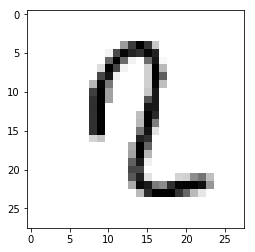

[7] incorrectly classified as [1]


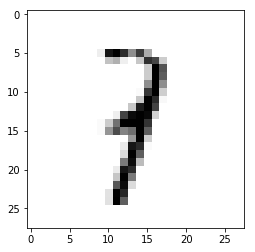

[2] incorrectly classified as [7]


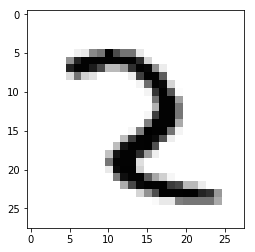

[2] incorrectly classified as [7]


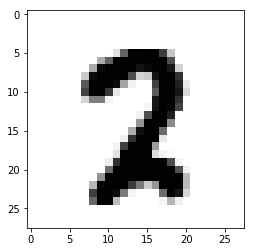

[7] incorrectly classified as [2]


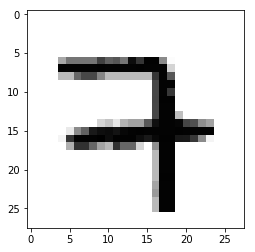

[2] incorrectly classified as [1]


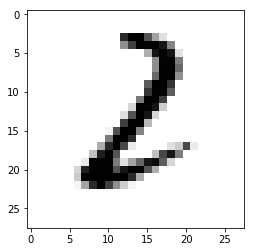

[2] incorrectly classified as [1]


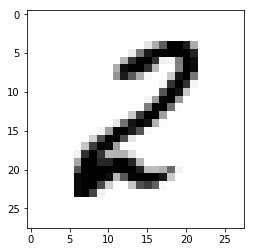

[2] incorrectly classified as [1]


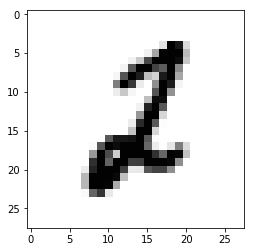

[2] incorrectly classified as [1]


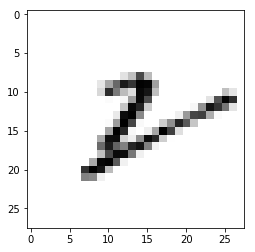

[2] incorrectly classified as [7]


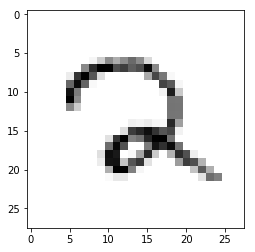

[2] incorrectly classified as [1]


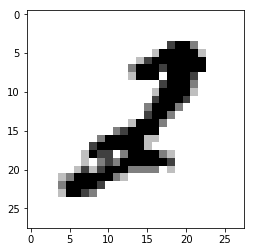

[7] incorrectly classified as [1]


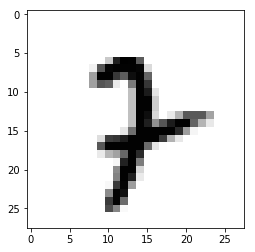

[7] incorrectly classified as [1]


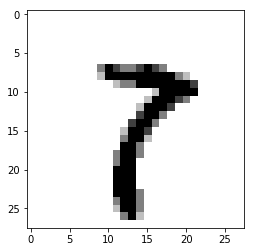

[7] incorrectly classified as [1]


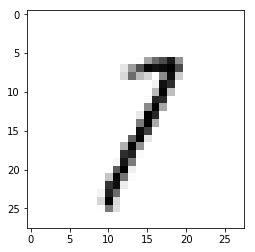

[2] incorrectly classified as [1]


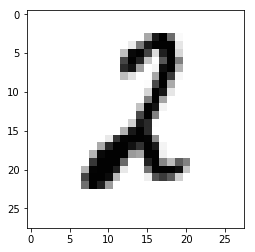

[2] correctly classified as [2]


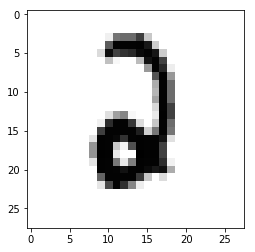

[7] correctly classified as [7]


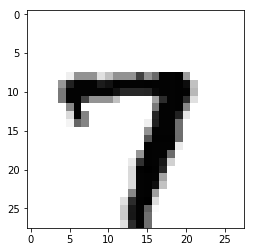

[7] correctly classified as [7]


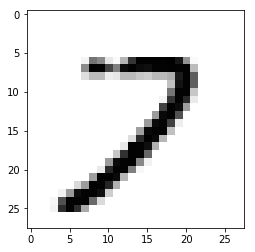

[2] correctly classified as [2]


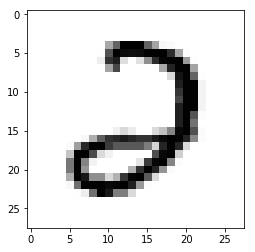

[1] correctly classified as [1]


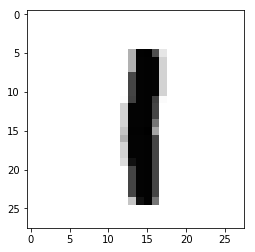

[1] correctly classified as [1]


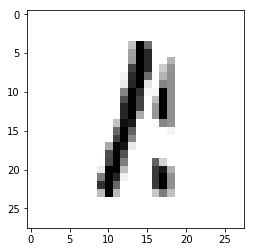

[1] correctly classified as [1]


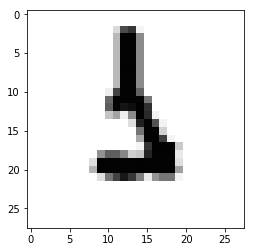

[7] correctly classified as [7]


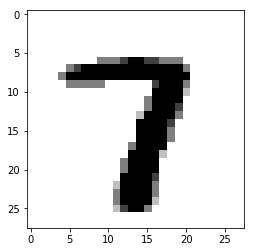

[2] correctly classified as [2]


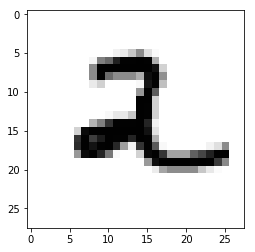

[1] correctly classified as [1]


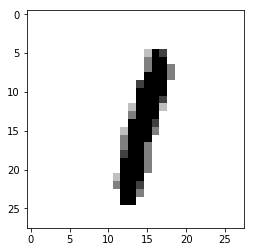

In [3]:
import random
from matplotlib import pyplot as plt
e = np.array([1, 1, 1])
incorrect_labels = np.argwhere(y1.flatten()!=y_test.flatten()).flatten()
random.shuffle(incorrect_labels)
incorrect_labels = incorrect_labels[0:15]


for i in incorrect_labels:
    print(y_test[i], 'incorrectly classified as', y1[i])
    pic = np.tensordot(x_test[i,:].reshape([28,28]),e,axes=0)
    plt.imshow(255-pic)
    plt.show()
    
correct_labels = np.argwhere(y1.flatten()==y_test.flatten()).flatten()
random.shuffle(correct_labels)
correct_labels = correct_labels[0:10]

for i in correct_labels:
    print(y_test[i], 'correctly classified as', y1[i])
    pic = np.tensordot(x_test[i,:].reshape([28,28]),e,axes=0)
    plt.imshow(255-pic)
    plt.show()
    
    
    


2c) Implement a function that does 5-fold cross validation on the training data x_train, y_train, and use it to select the classifier with the best accuracy from K =1, 3, 5, 7, 9.

The most accurate classifier has K= 1  with cross-validation accuracy: 0.9233333333333335


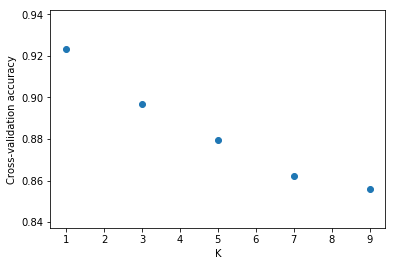

In [5]:
kvals = [1, 3, 5, 7, 9]
acc = np.zeros(len(kvals))
for i in range(len(kvals)):
    acc[i] = problem2_func.cross_valid_acc(x_train,y_train,5,kvals[i])
plt.scatter(kvals,acc)
plt.xlabel('K')
plt.ylabel('Cross-validation accuracy')
k_best = kvals[np.argmax(acc)]
print('The most accurate classifier has K=', k_best, ' with cross-validation accuracy:', acc[np.argmax(acc)])


2d) For the best classifier from 2c, report the accuracy on the held-out test data.

In [6]:
K = k_best
yy = problem2_func.classify(x_train,y_train,x_test,K)
print('Accuracy of the best classifer from 2c on held-out test data:', problem2_func.accuracy(y_test,yy))



Accuracy of the best classifer from 2c on held-out test data: 0.9599374021909233
